### Task 1:Mengimpor Library

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2:Memasukan Data

menggunakan Advertising Dataset untuk mendapatkan pendapatan penjualan yang dihasilkan sehubungan dengan pengeluaran iklan di berbagai saluran seperti radio, tv, dan surat kabar.

In [28]:
advert = pd.read_csv('/tmp/Advertising.csv')
advert

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Korelasi 

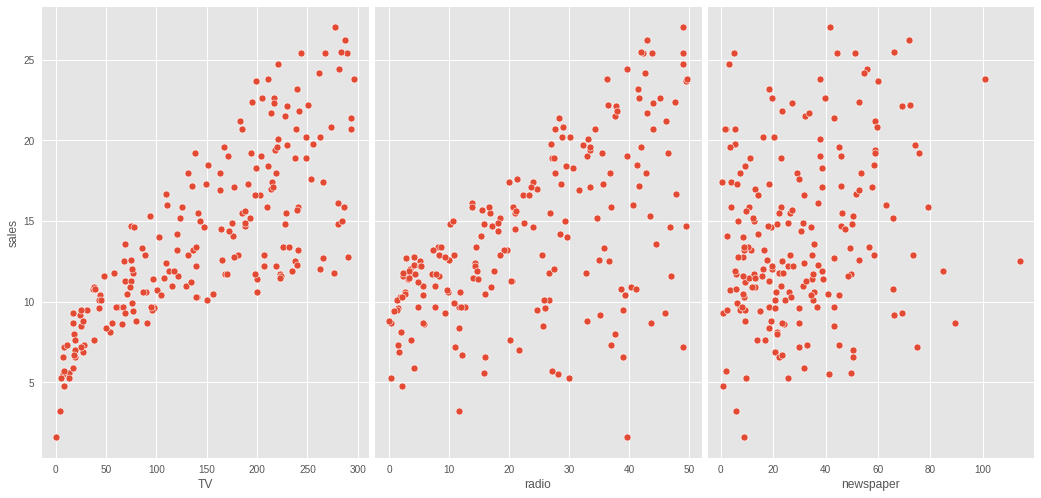

In [30]:
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

### Task 4: Membuat model Multiple Linear Regression 

Membuat Model Multiple Linear regression untuk mencari Gradient dan intercept

In [31]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advert[feature_cols]
y = advert.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [32]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

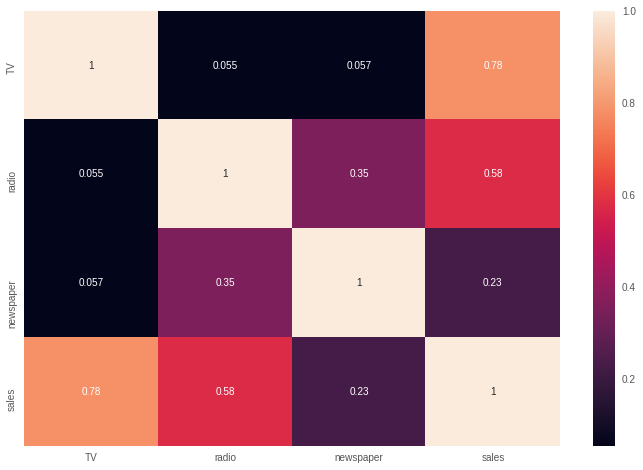

In [33]:
sns.heatmap(advert.corr(), annot=True)

### Task 5: Feature Selection

Menghitung kualitas model yang kita buat apakah baik digunakan atau tidak menggunakan R^2-Squared ini ini termasuk ke dalam Model Evaluasi

In [34]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828957


In [35]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


Melakukan Uji Statistik dengan Statmodels

In [36]:
import statsmodels.api as sm

In [37]:
model = sm.OLS(y,X).fit()

In [38]:
prediksi = model.predict(X)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):                   2.43e-171
Time:                        13:50:18   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 6: Evaluasi Model Menggunakan Train / Test Split dan Metrics


Melakukan Pemisahan menggunakan Train/test split dan melakukan evaluasi model menggunakan Metrics

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.404651423032895
R^2:  0.9156213613792232


In [41]:
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("intercept:",lm5.intercept_ )
print("Gradien/slope Coefficient:",lm5.coef_ )
print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

intercept: 2.9272373202664816
Gradien/slope Coefficient: [0.04660234 0.18117959]
RMSE : 1.387903469938289
R^2:  0.9176214942248907


In [42]:
print("berapa jumlah uang yang diinvestasikan:")
tv = float(input("TV : "))
radio = float(input("Radio : "))

lm5_preds = lm5.predict([[tv,radio]])
print(f"penjualan yang didapatkan sebesar ${lm5_preds} dengan mengiklankan ${tv} pada TV dan ${radio} di radio")
#Anda akan mendapatkan penjualan Rs747.61 dengan mengiklankan Rs19.0 di TV, Rs19.0 di Radio, dan Rs19.0 di koran.

berapa jumlah uang yang diinvestasikan:
TV : 100
Radio : 200
penjualan yang didapatkan sebesar $[43.8233898] dengan mengiklankan $100.0 pada TV dan $200.0 di radio


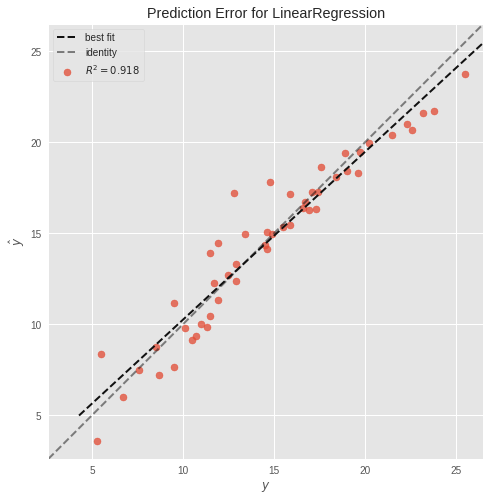

In [43]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

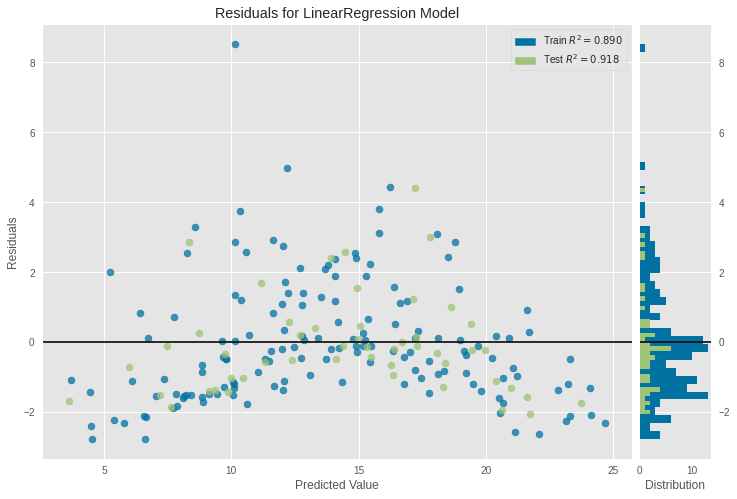

In [44]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

### Task 7: Interaction Effect (Synergy)

In [45]:
advert['interaction'] = advert['TV'] * advert['radio']

In [46]:
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 0.7011871137164328
R^2:  0.978973681468126


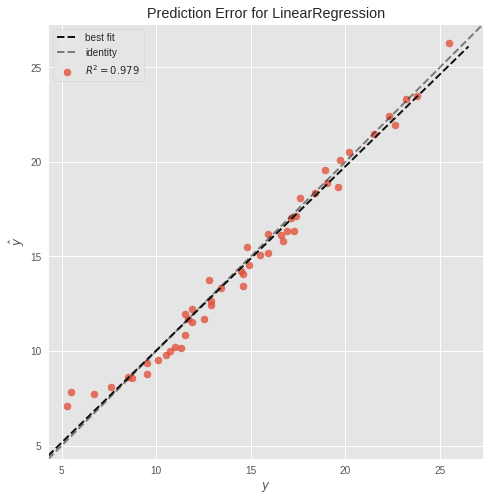

In [47]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [48]:
print("berapa jumlah uang yang diinvestasikan:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
interaction = float(input("Interaction:"))
lm6_preds = lm6.predict([[tv,radio,interaction]])
print(f"penjualan yang didapatkan sebesar ${lm5_preds} dengan mengiklankan ${tv} pada TV, ${radio} di radio dan terakhir ${interaction} yang didaptkan melalui interaction")
#Anda akan mendapatkan penjualan Rs747.61 dengan mengiklankan Rs19.0 di TV, Rs19.0 di Radio, dan Rs19.0 di koran.

berapa jumlah uang yang diinvestasikan:
TV : 100
Radio : 200
Interaction:100
penjualan yang didapatkan sebesar $[43.8233898] dengan mengiklankan $100.0 pada TV, $200.0 di radio dan terakhir $100.0 yang didaptkan melalui interaction
